# Sorting with NumPy



Intel Publishes Blazing Fast [Intel AVX-512](https://www.phoronix.com/news/Intel-AVX-512-Quicksort-Numpy) **Sorting Library, Numpy** Switching To It For 10~17x Faster Sorts

Here we will compare quicksort, mergesort and heapsort both strqaighforward loop implementations versus NumPy equivalents


In [1]:
import numpy as np
import time
BIG = 1_000_000
np.random.seed(seed=12)
arr = np.random.rand(BIG)
orig = arr.copy()

In [2]:
def heapify(arr, n, i):
    largest = i 
    l = 2 * i + 1 
    r = 2 * i + 2 
 
    if l < n and arr[largest] < arr[l]:
        largest = l
 
    if r < n and arr[largest] < arr[r]:
        largest = r
 
    if largest != i:
        arr[i],arr[largest] = arr[largest],arr[i]  
        heapify(arr, n, largest)
 
def heapSort(arr):
    n = len(arr)
 
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)
 
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i] 
        heapify(arr, i, 0)
    return arr


# Heapsort

for hint how to specify the type of sort - look here: [NumPy:Sort](https://numpy.org/doc/stable/reference/generated/numpy.sort.html)

**Hint:**

```python
np.sort(arr, axis=None, kind='heapsort') 
```

In [3]:
np.random.seed(seed=12)
arr = np.random.rand(BIG)
timing = {}
t1 = time.time()
heapSort(arr)
t2 = time.time()
print("Sorted array is:")
print(arr[:10] )
timing['heapsort_bruteForce'] = time.time() - t1
print('Elapsed time', timing['heapsort_bruteForce'])

Sorted array is:
[2.28111607e-07 1.24986451e-06 3.68083421e-06 3.71024707e-06
 5.31942260e-06 6.28050246e-06 9.15051794e-06 1.00062463e-05
 1.00819828e-05 1.02331299e-05]
Elapsed time 31.06677484512329


In [4]:
np.random.seed(seed=12)
arr = np.random.rand(BIG)
t1 = time.time()
################### add code here ###########
np.sort(arr, axis=None, kind='heapsort') 
#############################################
t2 = time.time()
print("Sorted array is:")
print(arr[:10] )
timing['heapsort_numpy'] = time.time() - t1
print('Elapsed time', timing['heapsort_numpy'])
print('Numpy Acceleration: {:4.1f} X faster'.format(timing['heapsort_bruteForce']/timing['heapsort_numpy']))

Sorted array is:
[0.15416284 0.7400497  0.26331502 0.53373939 0.01457496 0.91874701
 0.90071485 0.03342143 0.95694934 0.13720932]
Elapsed time 0.2836883068084717
Numpy Acceleration: 109.5 X faster


<BarContainer object of 2 artists>

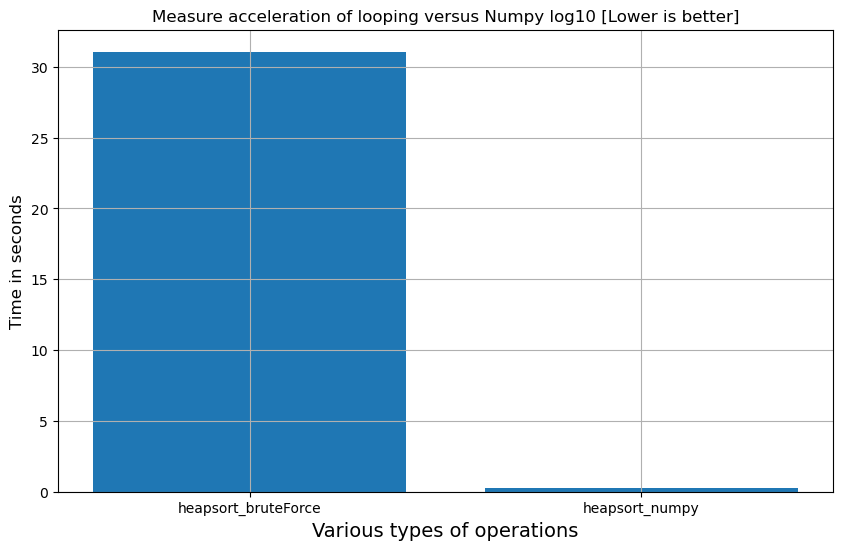

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title("Measure acceleration of looping versus Numpy log10 [Lower is better]",fontsize=12)
plt.ylabel("Time in seconds",fontsize=12)
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.bar(x = list(timing.keys()), height= list(timing.values()), align='center',tick_label=list(timing.keys()))

In [6]:
def quickSort(arr, low, high):
    if low < high:
        pivotIndex = partition(arr, low, high)
        quickSort(arr, low, pivotIndex - 1)
        quickSort(arr, pivotIndex + 1, high)

def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1  # Index of smaller element
    for j in range(low, high):
        # If current element is smaller than or equal to pivot
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return i + 1


# Quicksort

for hint how to specify the type of sort - look here: [NumPy:Sort](https://numpy.org/doc/stable/reference/generated/numpy.sort.html)

**Hint:**

```python
np.sort(arr, axis=None, kind='quicksort')
```

In [7]:
import time
np.random.seed(seed=12)
arr = np.random.rand(BIG)
timing = {}
t1 = time.time()
quickSort(arr, 0, len(arr)-1)
t2 = time.time()
print("Sorted array is:")
timing['quicksort_bruteForce'] = time.time() - t1
print('Elapsed time', timing['quicksort_bruteForce'])

Sorted array is:
Elapsed time 13.656383752822876


In [8]:
np.random.seed(seed=12)
arr = np.random.rand(BIG)
t1 = time.time()
################### add code here ###########
np.sort(arr, axis=None, kind='quicksort')
############################################# 
t2 = time.time()
print("Sorted array is:")
timing['quicksort_numpy'] = time.time() - t1
print('Elapsed time', timing['quicksort_numpy'])
print('Numpy Acceleration: {:4.1f} X faster'.format(timing['quicksort_bruteForce']/timing['quicksort_numpy']))

Sorted array is:
Elapsed time 0.2236955165863037
Numpy Acceleration: 61.0 X faster


<BarContainer object of 2 artists>

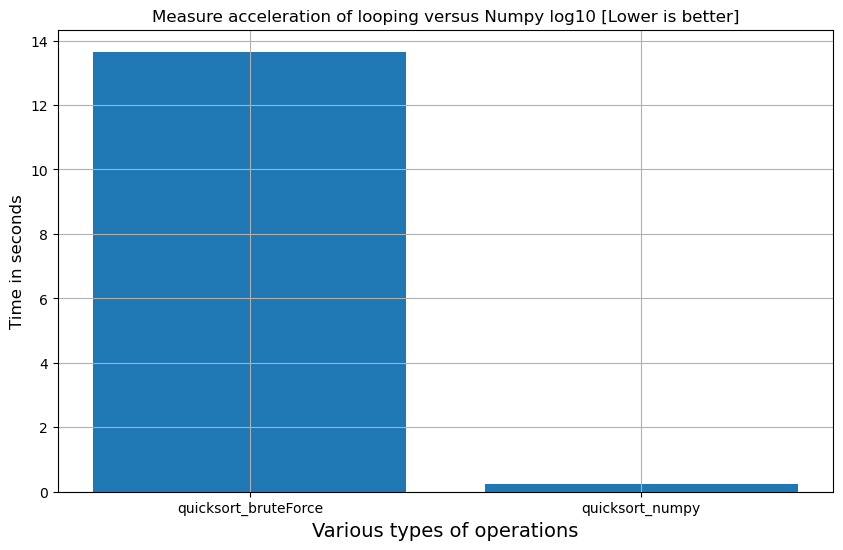

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title("Measure acceleration of looping versus Numpy log10 [Lower is better]",fontsize=12)
plt.ylabel("Time in seconds",fontsize=12)
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.bar(x = list(timing.keys()), height= list(timing.values()), align='center',tick_label=list(timing.keys()))

# Mergesort


In [10]:
def mergeSort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        leftHalf = arr[:mid]
        rightHalf = arr[mid:]
        
        mergeSort(leftHalf)
        mergeSort(rightHalf)
        
        i = j = k = 0
        
        while i < len(leftHalf) and j < len(rightHalf):
            if leftHalf[i] < rightHalf[j]:
                arr[k] = leftHalf[i]
                i += 1
            else:
                arr[k] = rightHalf[j]
                j += 1
            k += 1
        
        while i < len(leftHalf):
            arr[k] = leftHalf[i]
            i += 1
            k += 1
        
        while j < len(rightHalf):
            arr[k] = rightHalf[j]
            j += 1
            k += 1

In [11]:
import time
np.random.seed(seed=12)
arr = np.random.rand(BIG)
timing = {}
t1 = time.time()
mergeSort(arr)
t2 = time.time()
print("Sorted array is:")
timing['mergesort_bruteForce'] = time.time() - t1
print('Elapsed time', timing['mergesort_bruteForce'])

Sorted array is:
Elapsed time 19.34588932991028


for hint how to specify the type of sort - look here: [NumPy:Sort](https://numpy.org/doc/stable/reference/generated/numpy.sort.html)

**Hint:**

```python
np.sort(arr, axis=None, kind='mergesort')
```

In [12]:
np.random.seed(seed=12)
arr = np.random.rand(BIG)
t1 = time.time()
################### add code here ###########
np.sort(arr, axis=None, kind='mergesort')
#############################################
t2 = time.time()
print("Sorted array is:")
timing['mergesort_numpy'] = time.time() - t1
print('Elapsed time', timing['mergesort_numpy'])
print('Numpy Acceleration: {:4.1f} X faster'.format(timing['mergesort_bruteForce']/timing['mergesort_numpy']))

Sorted array is:
Elapsed time 0.15818572044372559
Numpy Acceleration: 122.3 X faster


In [13]:
# import matplotlib.pyplot as plt
# plt.scatter(orig[0:len(orig)-1], orig[1:len(orig)], c='r')
# plt.scatter(arr[0:len(arr)-1], arr[1:len(arr)], c='b')

<BarContainer object of 2 artists>

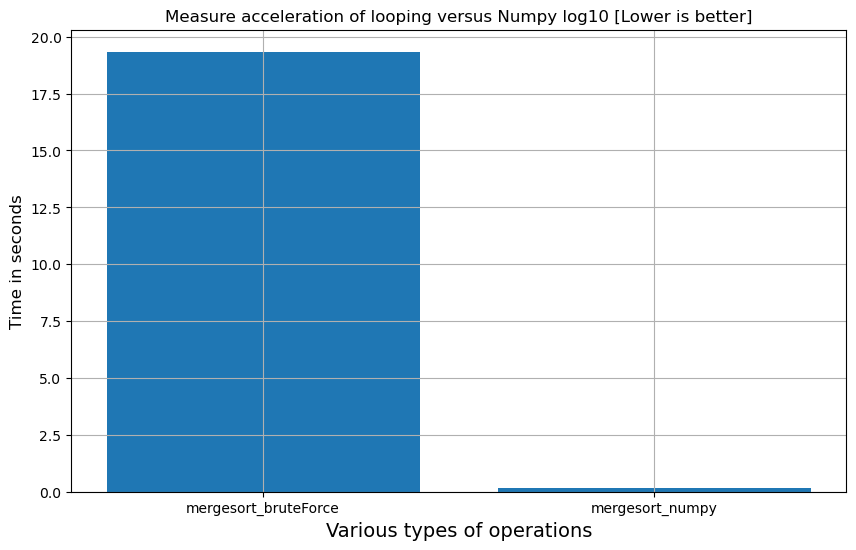

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title("Measure acceleration of looping versus Numpy log10 [Lower is better]",fontsize=12)
plt.ylabel("Time in seconds",fontsize=12)
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.bar(x = list(timing.keys()), height= list(timing.values()), align='center',tick_label=list(timing.keys()))

In [15]:
print("All Done!")

All Done!
